In [2]:
from algorithms.mis import Mis
import tools.files as files

In [3]:
# Instancio la clase Mis

mis = Mis()

In [4]:
# Opcion 3: Crear una lista de conexiones y setearla

my_edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (4, 5), (5, 2), (6, None)]

mis.set_edge_list(my_edge_list)

In [35]:
porcentaje = 0.2
cant_vertices = 100

matrix = mis.random_matrix_with_porc(cant_vertices, porcentaje)

print(matrix)

[[0 0 0 ... 0 1 1]
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


{0: [1], 1: [0, 2, 3], 2: [1, 3, 5], 3: [1, 2], 4: [5], 5: [2, 4], 6: []}



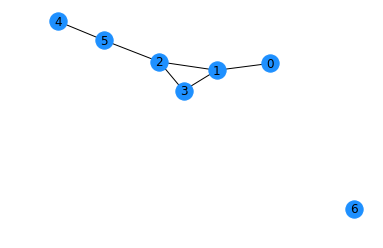

In [5]:
# Graficar el grafo

mis.graph.show_graph()
print()

mis.plot_graph()

Evaluating all subset...
[(6, 0), (0, 1), (4, 1), (3, 2), (5, 2), (1, 3), (2, 3)]

Execution time 0.00029500000000126647 seconds, or 4.9166666666877745e-06 minutes

Maximum independent set = {0, 3, 4, 6}



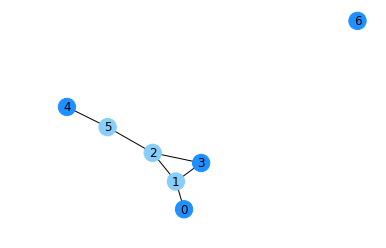

In [6]:
# Graficar el grafo con mis

mis_result, time = mis.maximum_independent_set_heuristic(verbose=False)

print('\nExecution time {} seconds, or {} minutes'.format(time, (time/60)))

print('\nMaximum independent set = {}\n'.format(mis_result))

mis.plot_graph(mis_result)

In [7]:
# Probar el algoritmo para distintos tamanios de N

files.reset_result("result_mis_heuristico")

for n in range(5, 100):

    porcentaje = 0.10

    matrix = mis.random_matrix_with_porc(n, porcentaje)

    _, time = mis.maximum_independent_set_heuristic(verbose=False)

    result = "{},{}\r".format(n, time)

    # Guardo los resultados
    files.save_result("result_mis_heuristico", result)

print("\nEnd!")

Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...
Evaluating all subset...


In [8]:
# Funcion para graficar los resultados

import matplotlib.pyplot as plt

def plot_historic(nodes, times):

    plt.plot(nodes, times)

    plt.xlabel('Cantidad de nodos')
    plt.ylabel('Ejecucion en minutos')

    plt.suptitle('Crecimiento del costo temporal')

    plt.savefig('tools/results/mis_heuristico.png', dpi=600)
    
    plt.show()

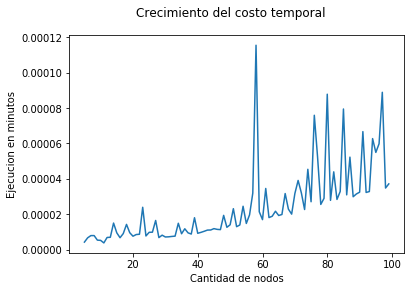

In [9]:
# Leo los resultados y los grafico

results = files.read_result("result_mis_heuristico")

nodes = []
times = []

for result in results:

    res = result.split(',')
    res[1] = res[1].split()[0]

    nodes.append(int(res[0]))
    times.append(float(res[1]) / 60)

plot_historic(nodes, times)

In [23]:
def load_data(results):

    nodes = []
    times = []

    for result in results:

        res = result.split(',')
        res[1] = res[1].split()[0]

        nodes.append(int(res[0]))
        times.append(float(res[1]) / 60)
    
    return (nodes, times)

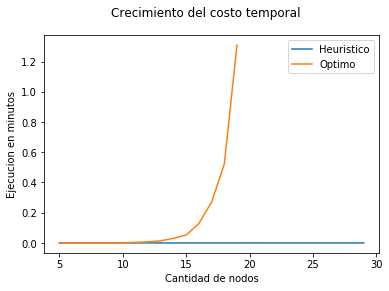

In [31]:
# Comparativa optimo vs heuristico
import matplotlib.pyplot as plt

# cargo los datos
results_h = files.read_result("result_mis_heuristico")
results_o = files.read_result("result_mis_optimo")

h = load_data(results_h)
o = load_data(results_o)


# Grafico

plt.plot(h[0], h[1], label='Heuristico')
plt.plot(o[0], o[1], label='Optimo')
plt.legend()

plt.xlabel('Cantidad de nodos')
plt.ylabel('Ejecucion en minutos')

plt.suptitle('Crecimiento del costo temporal')

plt.savefig('tools/results/comparativa.png', dpi=600)

plt.show()